# REGRESSION (LINEAR, LASSO,RIDGE, ELASTICNET)

This data shows the chance of admit in a univerity based on GRE Score, TOEFL Score, University Rating,	SOP,LOR	CGPA,	and Research. 
The goal is to predict chance of admit based on the above mentioned parameter?

What are the parameters in data?
GRE Score, TOEFL Score, University Rating, SOP,LOR CGPA, Research

What is the output?
Chance of admit

In [6]:
# Importing required libararies

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import pickle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import numpy as np
import pandas as pd
%matpllotlib inline

UsageError: Line magic function `%matpllotlib` not found.


In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Performing EDA on data

In [4]:
data= pd.read_csv('Admission_Prediction.csv') 
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.drop(columns="Serial No.", inplace=True)
#We don' need  serial column

In [6]:
data.describe(include="all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.isna().sum() # Some missing values present

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
# Columns GRE, Tofel and Univeristy have missing values

In [9]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [10]:
data.isna().sum() # Data has no missing values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [12]:
# Checking data distribution for every column

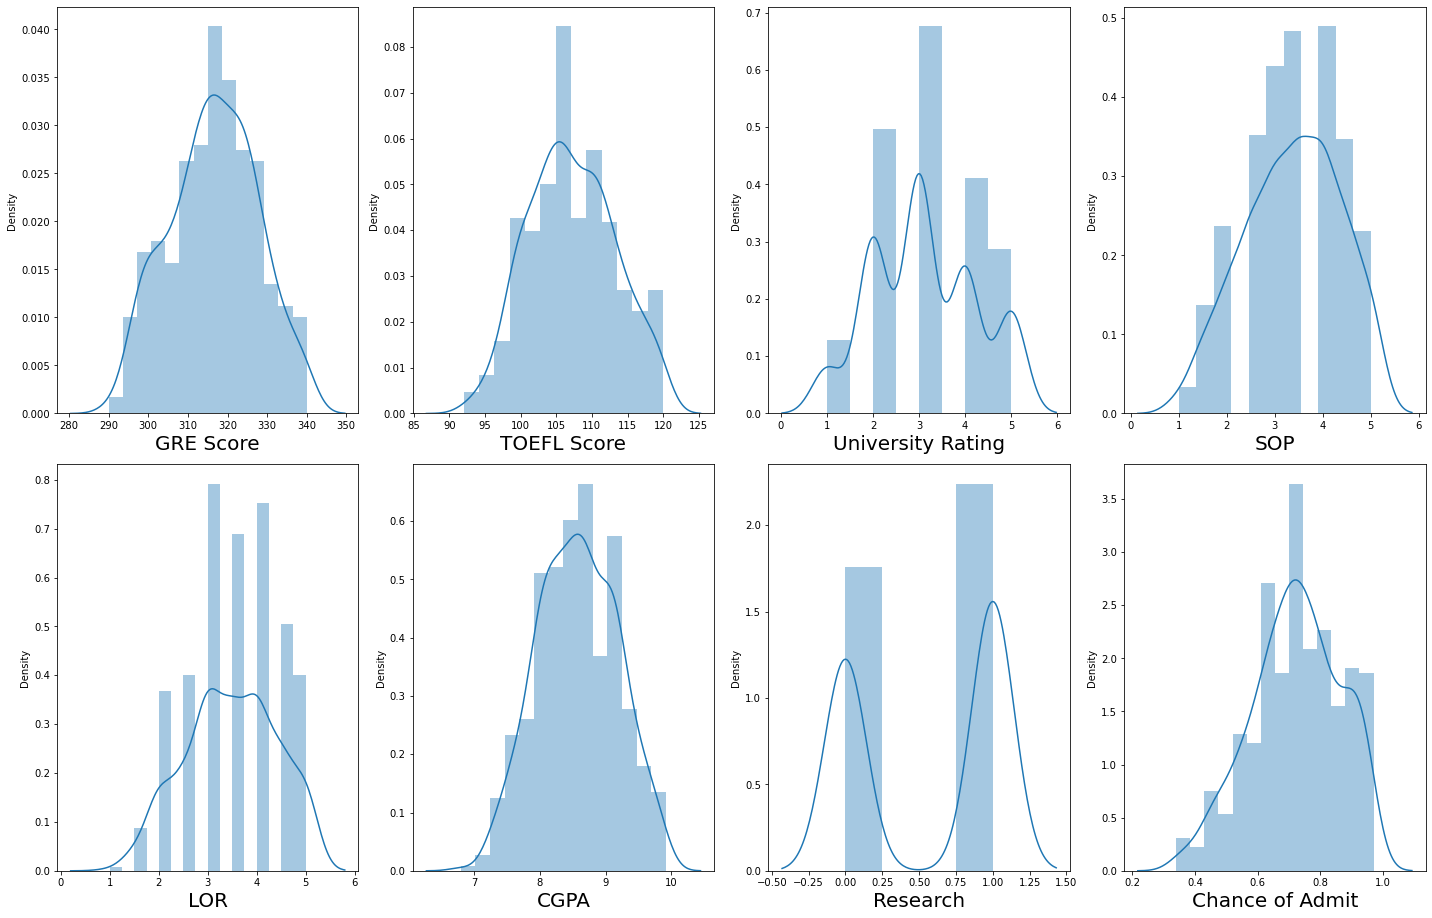

In [13]:

plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
# The data distribution is not skewed in any column

In [15]:
y = data['Chance of Admit']
X = data.drop(columns =['Chance of Admit'])

In [16]:
# Observing relationship between independe variables and dependent variable

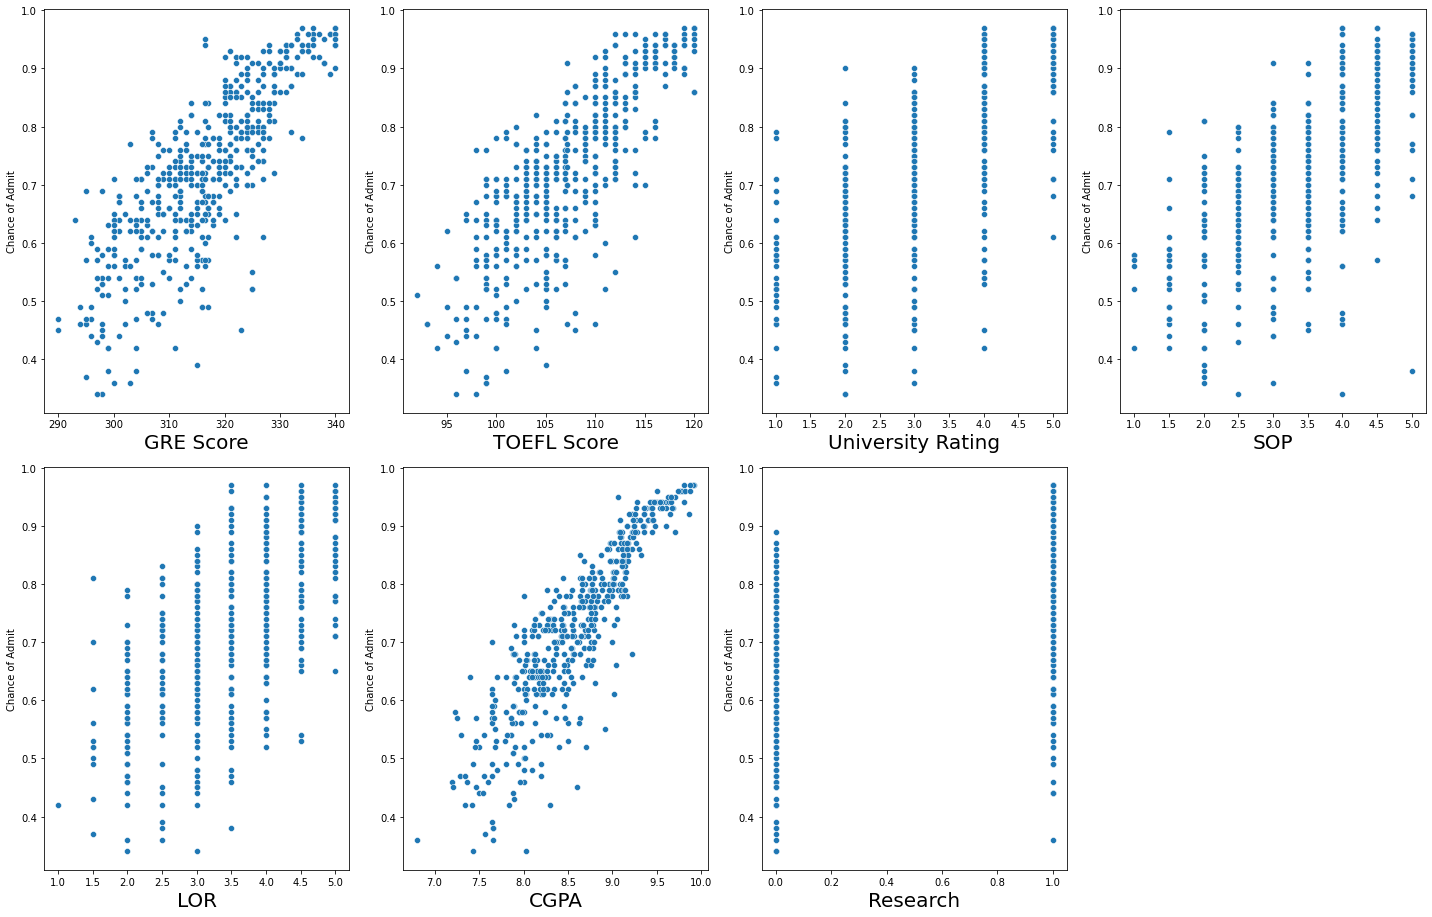

In [17]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(X[column],y)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Checking multicolinaerity betweeen input variables

In [20]:
variables = X_scaled
vif = pd.DataFrame()
# Here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [21]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


No column has VIF greater than 5
No multicolinaerity in data

In [22]:
# EDA with Pandas Profiling

In [23]:
pf = ProfileReport(data)

In [24]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# Splitting data into test and train data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [27]:
# Performing linear regrssion

In [44]:
lreg = LinearRegression()

In [45]:
lreg.fit(x_train,y_train)

LinearRegression()

In [56]:
l1 = lreg.score(x_train,y_train)

In [57]:
l2 =lreg.score(x_test, y_test)

In [70]:
model = {"linear_train":l1, "linear_test":l2}

In [59]:
# Performing Ridge regrssion

In [64]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(x_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.04229242874389508}
0.8208084280341337


In [68]:
ridgeReg = Ridge(alpha=0.042, normalize=True)
ridgeReg.fit(x_train,y_train)
r1 = ridgeReg.score(x_train,y_train)

In [69]:
r2 =ridgeReg.score(x_test, y_test)

In [72]:
model = {"ridge_train":r1, "ridge_test":r2}


{'ridge_train': 0.8402471671089022, 'ridge_test': 0.7586020142686077}

In [73]:
# Performing Ridge regrssion

In [62]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(x_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.00010974987654930568}
0.8198928651630878


In [75]:
lasso = Lasso(alpha = 0.0001, normalize = True)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, normalize=True)

In [81]:
lasso.fit(x_train,y_train)
ls1 = lasso.score(x_train,y_train)
ls2 =lasso.score(x_test, y_test)

In [ ]:
# Performing Elastic net regrssion

In [78]:
params = {'alpha': (np.logspace(-8, 8, 100)), "l1_ratio":(np.logspace(-8, 8, 100))} 

Ennet_model = GridSearchCV(ENreg, params, cv = 10)
Ennet_model.fit(x_train,y_train)
print(Ennet_model.best_params_)
print(Ennet_model.best_score_)

{'alpha': 0.04229242874389508, 'l1_ratio': 0.029150530628251816}
0.8209012488694872


In [79]:
ENreg = ElasticNet(alpha=0.042, l1_ratio=0.029, normalize=False)
ENreg.fit(x_train,y_train)

ElasticNet(alpha=0.042, l1_ratio=0.029)

In [80]:
e1 = ENreg.score(x_train,y_train)
e2 =  ENreg.score(x_test, y_test)

In [100]:
model = {"linear_train":round(l1,2), "linear_test":round(l2,2),"lasso_train":round(ls1,2), "lasso_test":round(ls2,2), 
         "ridge_train":round(r1,2), "ridge_test":round(r2,2), "elastic_net_train":round(e1,2), "elastic_net_test":round(e2,2)}

In [101]:
# All Models score on test and train data 

In [102]:
model

{'linear_train': 0.84,
 'linear_test': 0.75,
 'lasso_train': 0.84,
 'lasso_test': 0.75,
 'ridge_train': 0.84,
 'ridge_test': 0.75,
 'elastic_net_train': 0.84,
 'elastic_net_test': 0.76}

All models perormed similar on test and train data. However, Elsticnet model performed slightly better than other models on test data.

In [103]:
# saving the Elstic net model in pickel file

In [116]:
filename = 'finalized_model.pickle'
pickle.dump(ENreg, open(filename, 'wb'))

In [117]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[305,112,5,5,5,10,1]]))
print("Chance of admit {}".format(a))

Chance of admit [0.91887084]
